In [1]:

import pandas as pd # type: ignore
import numpy as np # type: ignore
import sys
sys.path.append("../")
from imblearn.over_sampling import SMOTENC # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

from src import soporte_logistica_preprocesamiento as sl
from src import soporte_feature_scaling as sf
from src import soporte_encoding_logistica as se
from src import soporte_nulos as sn
from src import soporte_outliers as so

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
%load_ext autoreload
%autoreload 2

In [2]:
# leemos el dataframe
df_em = pd.read_csv("../data/employee_survey_data.csv", index_col = 0).reset_index(drop=True)
df_data = pd.read_csv("../data/general_data.csv", index_col = 0).reset_index()
df_manag = pd.read_csv("../data/manager_survey_data.csv", index_col = 0).reset_index(drop=True)


In [3]:
# Concatenar lateralmente
df = pd.concat([df_em, df_data, df_manag], axis=1)

In [4]:
# llamamos a la función para hacer el análisis exploratorio de datos, para familiarizarnos con la estructura de los datos
sl.exploracion_datos(df)

El número de filas es 4410 y el número de columnas es 29

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
WorkLifeBalance            0.861678
NumCompaniesWorked         0.430839
TotalWorkingYears          0.204082
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
EnvironmentSatisfaction,4385.0,2.723603,1.092756,1.0,2.00,3.0,4.00,4.0
JobSatisfaction,4390.0,2.728246,1.101253,1.0,2.00,3.0,4.00,4.0
WorkLifeBalance,4372.0,2.761436,0.706245,1.0,2.00,3.0,3.00,4.0
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Attrition,4410,2,No,3699
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
 3   Age                      4410 non-null   int64  
 4   Attrition                4410 non-null   object 
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  EmployeeCount            4410 non-null   int64  
 11  EmployeeID               4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel      

None

In [5]:
df.columns

Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [6]:
df.drop(columns=['EmployeeCount','Over18','EmployeeID','StandardHours',],inplace=True)

## Eliminacion de columnas:

**EmployeeCount**, **Over18**, **EmployeeID**, **StandardHours** Valores Unicos

In [7]:
# lo primero que vamos a hacer es calcular el porcentaje de nulos que tenemos para cada columna
gestionar_nulos = sn.GestionNulos(df)
nulos = gestionar_nulos.calcular_porcentaje_nulos()
nulos

EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
WorkLifeBalance            0.861678
NumCompaniesWorked         0.430839
TotalWorkingYears          0.204082
dtype: float64

In [8]:
gestionar_nulos.mostrar_distribucion_categoricas()

In [9]:
columnas_desconocido = df.select_dtypes(include=['object']).columns             # Vamos a reemplazar categoricas por  valor desconocido
columnas_moda = []            # Vamos a reemplazar categoricas por  valor desconocido

In [10]:
df = gestionar_nulos.imputar_nulos_categoricas(columnas_moda, columnas_desconocido)
df.head(2)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3,3
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2,4


In [11]:
# llamamos al método para imputar valores nulos con el método KNN
gestionar_nulos.imputar_knn(nulos.index)
# mostramos los resultados
df.head(2)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction_knn,JobSatisfaction_knn,WorkLifeBalance_knn,NumCompaniesWorked_knn,TotalWorkingYears_knn
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,1.0,1.0
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,0.0,6.0


In [12]:
df = df.drop(columns=['EnvironmentSatisfaction','JobSatisfaction','NumCompaniesWorked','TotalWorkingYears','WorkLifeBalance'])

df.rename(columns={'EnvironmentSatisfaction_knn': 'EnvironmentSatisfaction',
                    'JobSatisfaction_knn': 'JobSatisfaction', 
                    'NumCompaniesWorked_knn': 'NumCompaniesWorked',
                    'TotalWorkingYears_knn': 'TotalWorkingYears',
                    'WorkLifeBalance_knn': 'WorkLifeBalance'
                    }, inplace=True)
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked,TotalWorkingYears
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,11,0,6,1,0,0,3,3,3.0,4.0,2.0,1.0,1.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,23,1,3,5,1,4,2,4,3.0,2.0,4.0,0.0,6.0


In [13]:
df.duplicated().sum()

np.int64(2854)

In [14]:
df = df.drop_duplicates()

In [15]:
#Vamos a cambiar a object las columnas que son categorias para las visualizaciones.
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype('object')
df['JobSatisfaction'] = df['JobSatisfaction'].astype('object')
df['PerformanceRating'] = df['PerformanceRating'].astype('object')
df['JobLevel'] = df['JobLevel'].astype('object')
df['StockOptionLevel'] = df['StockOptionLevel'].astype('object')
df['JobInvolvement'] = df['JobInvolvement'].astype('object')
df['Education'] = df['Education'].astype('object')
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('object')


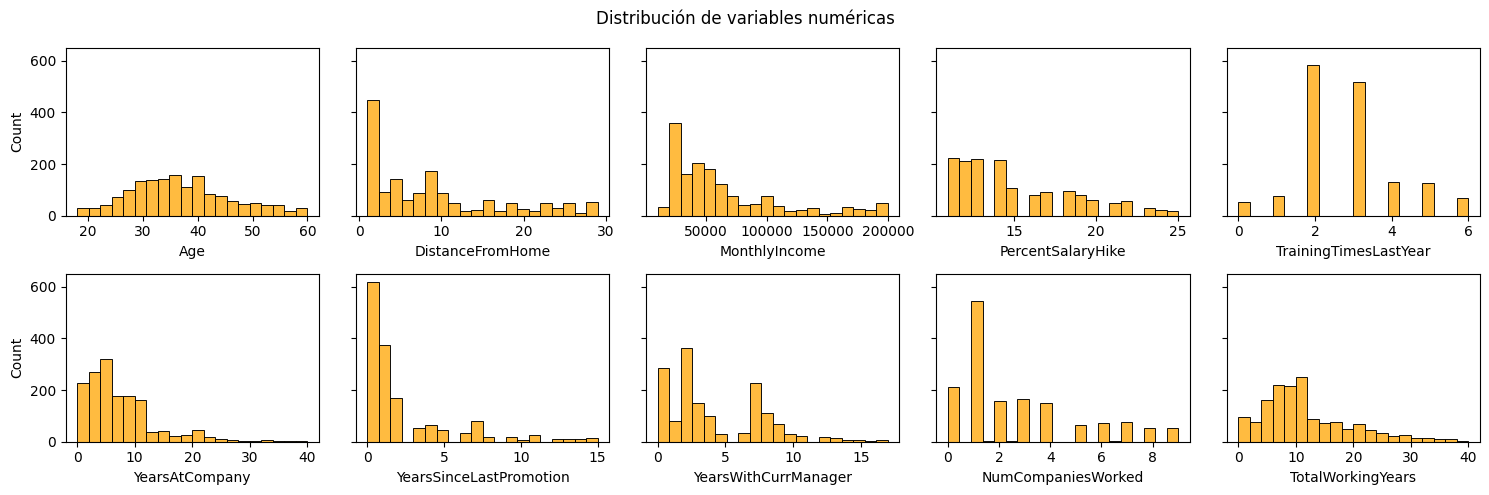

In [16]:
# Crear una instancia de la clase y llamar a los métodos
visualizador =sl.Visualizador(df)

# exploramos la distribución de las variables numéricas
visualizador.plot_numericas(color="orange")

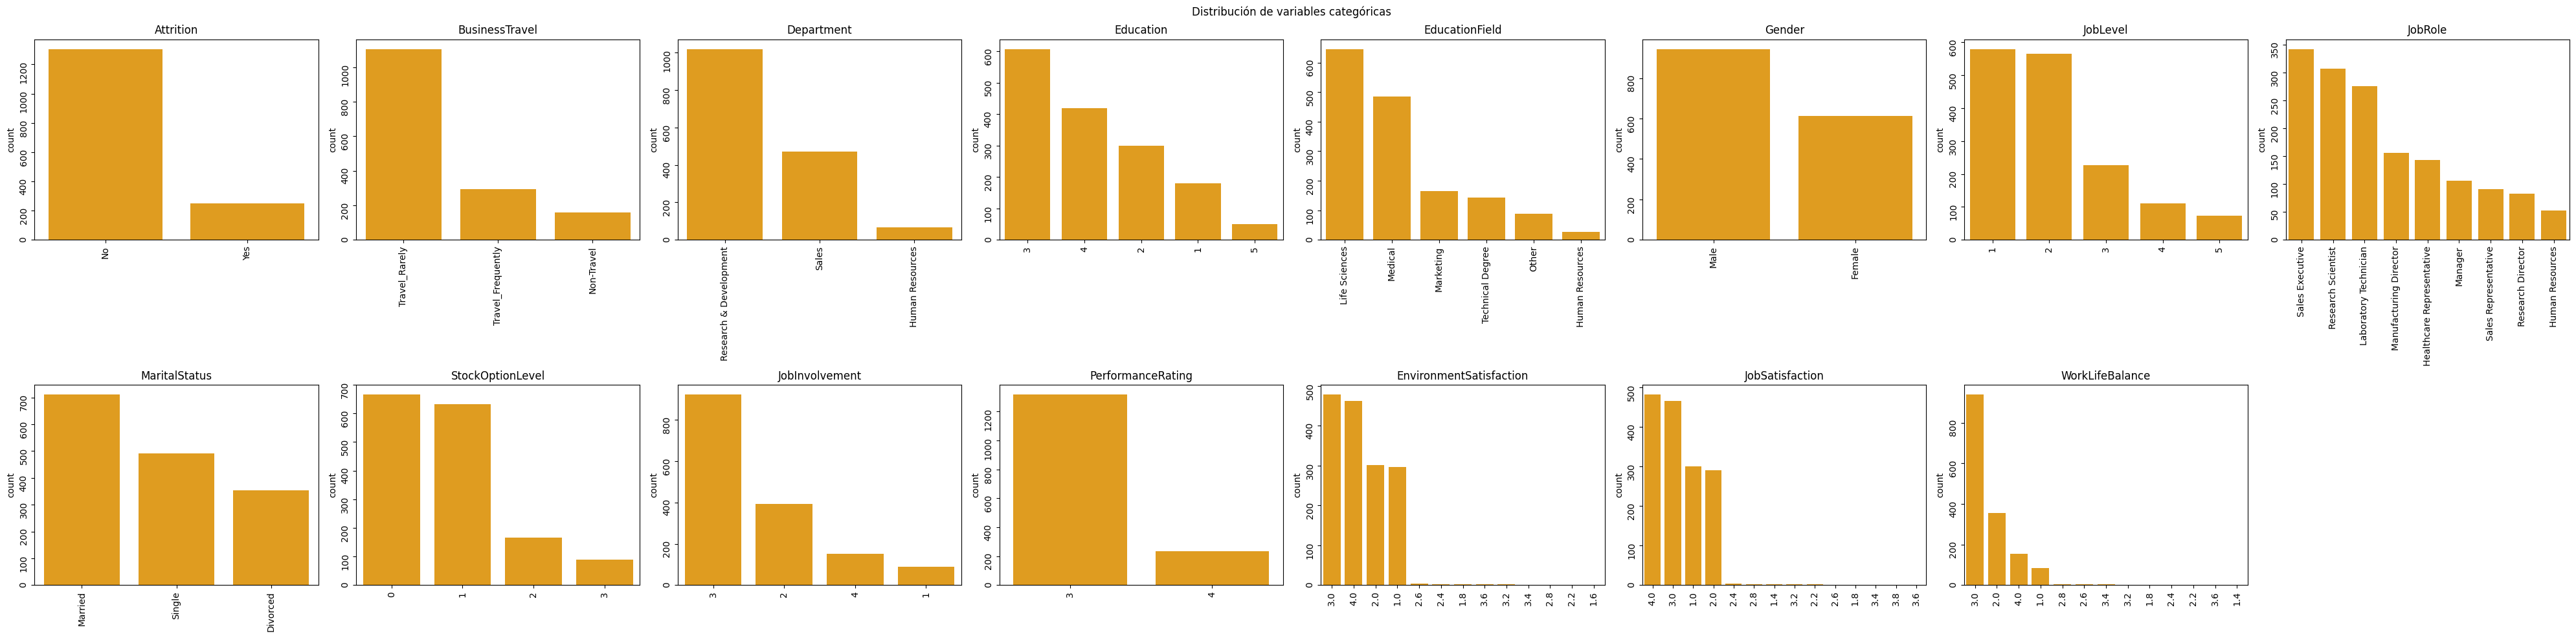

In [17]:
# evaluamos la distribución de las variables categóricas
visualizador.plot_categoricas(color = "orange")

In [18]:
df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked,TotalWorkingYears
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,11,0,6,1,0,0,3,3,3.0,4.0,2.0,1.0,1.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,23,1,3,5,1,4,2,4,3.0,2.0,4.0,0.0,6.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,15,3,2,5,0,3,3,3,2.0,2.0,1.0,1.0,5.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,11,3,5,8,7,5,2,3,4.0,4.0,3.0,3.0,13.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,12,2,2,6,0,4,3,3,4.0,1.0,3.0,4.0,9.0


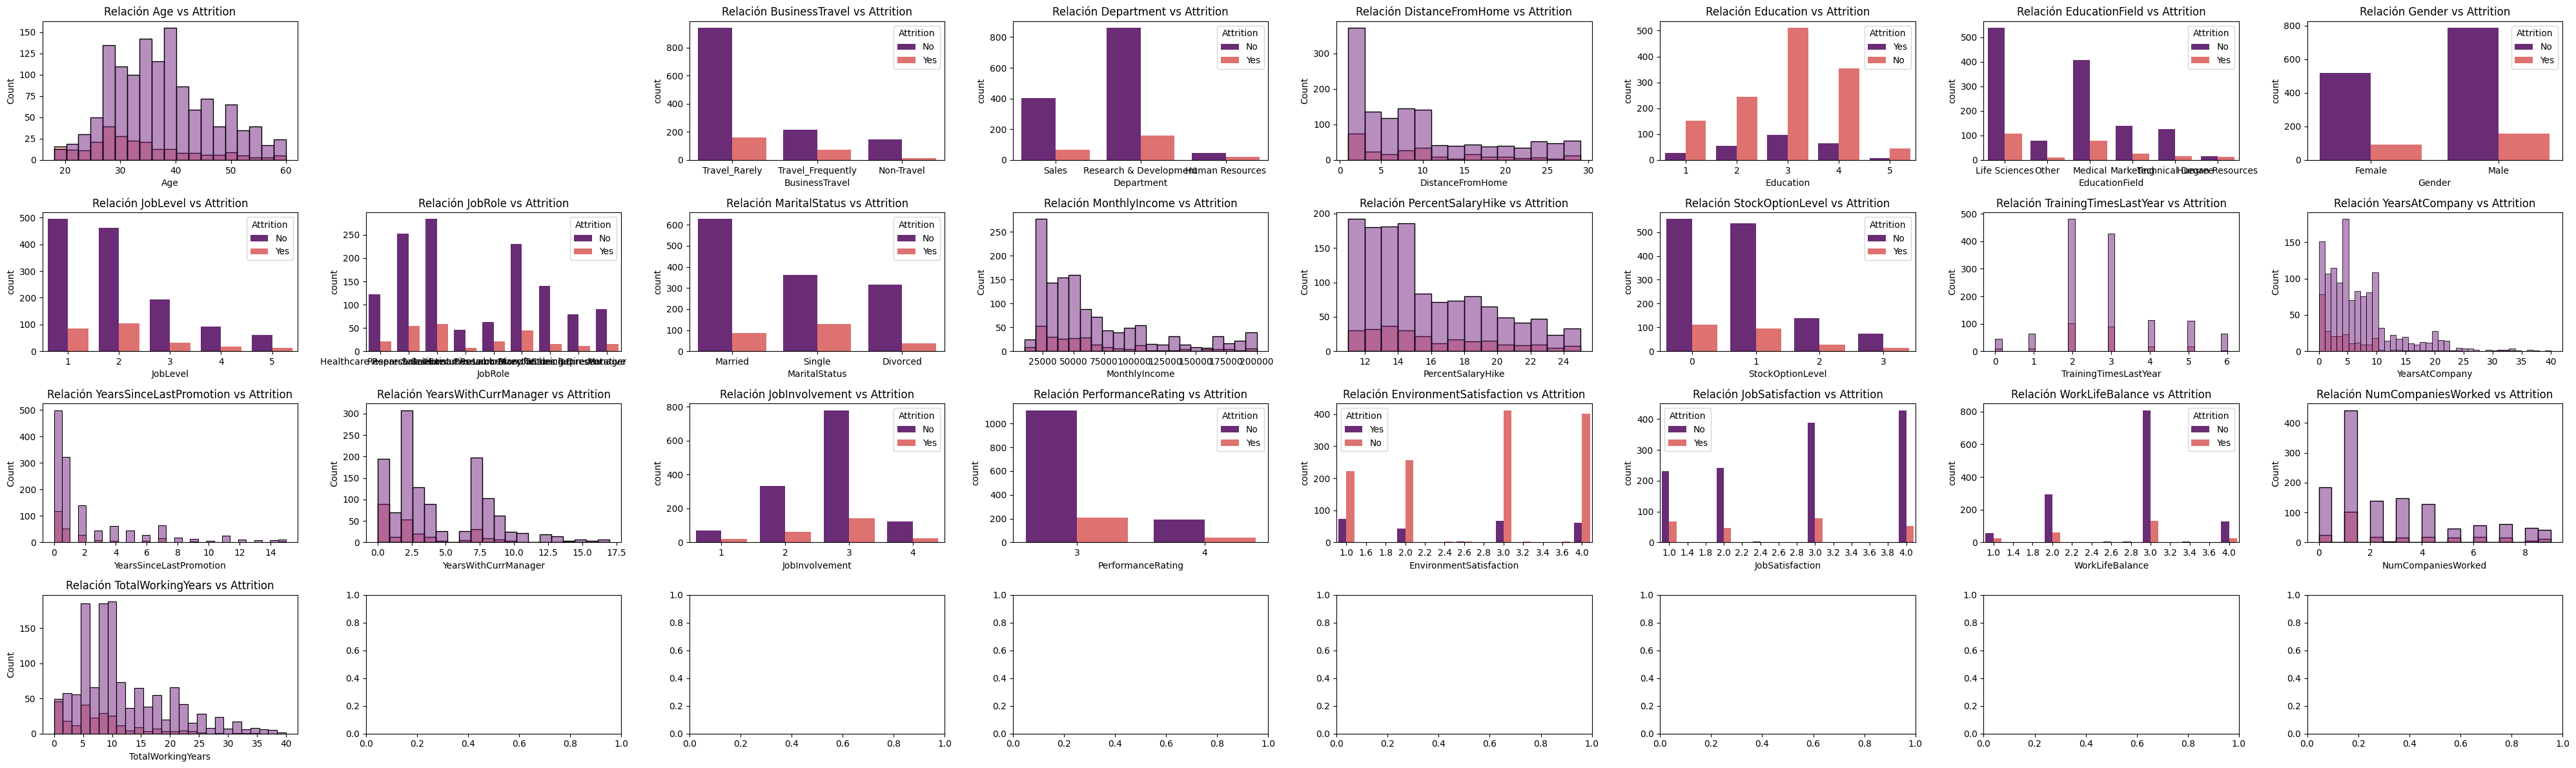

In [19]:
# evaluamos la relación entre las variables independientes y dependientes
visualizador.plot_relacion(vr = "Attrition")

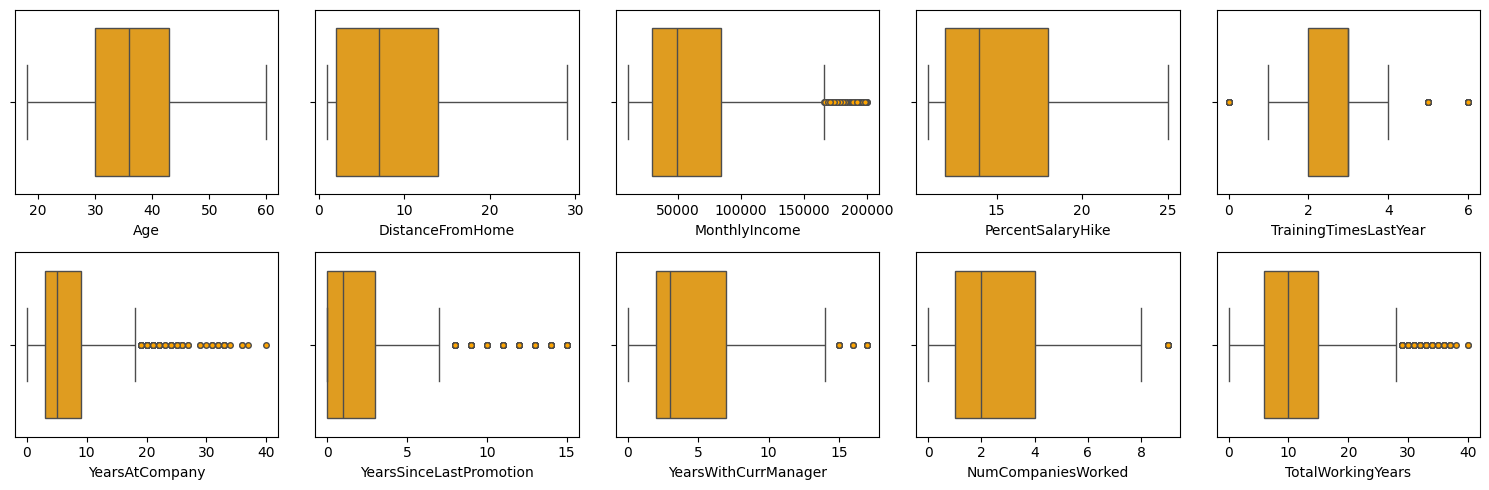

In [20]:
# detectamos los outliers
visualizador.deteccion_outliers(color = "orange")

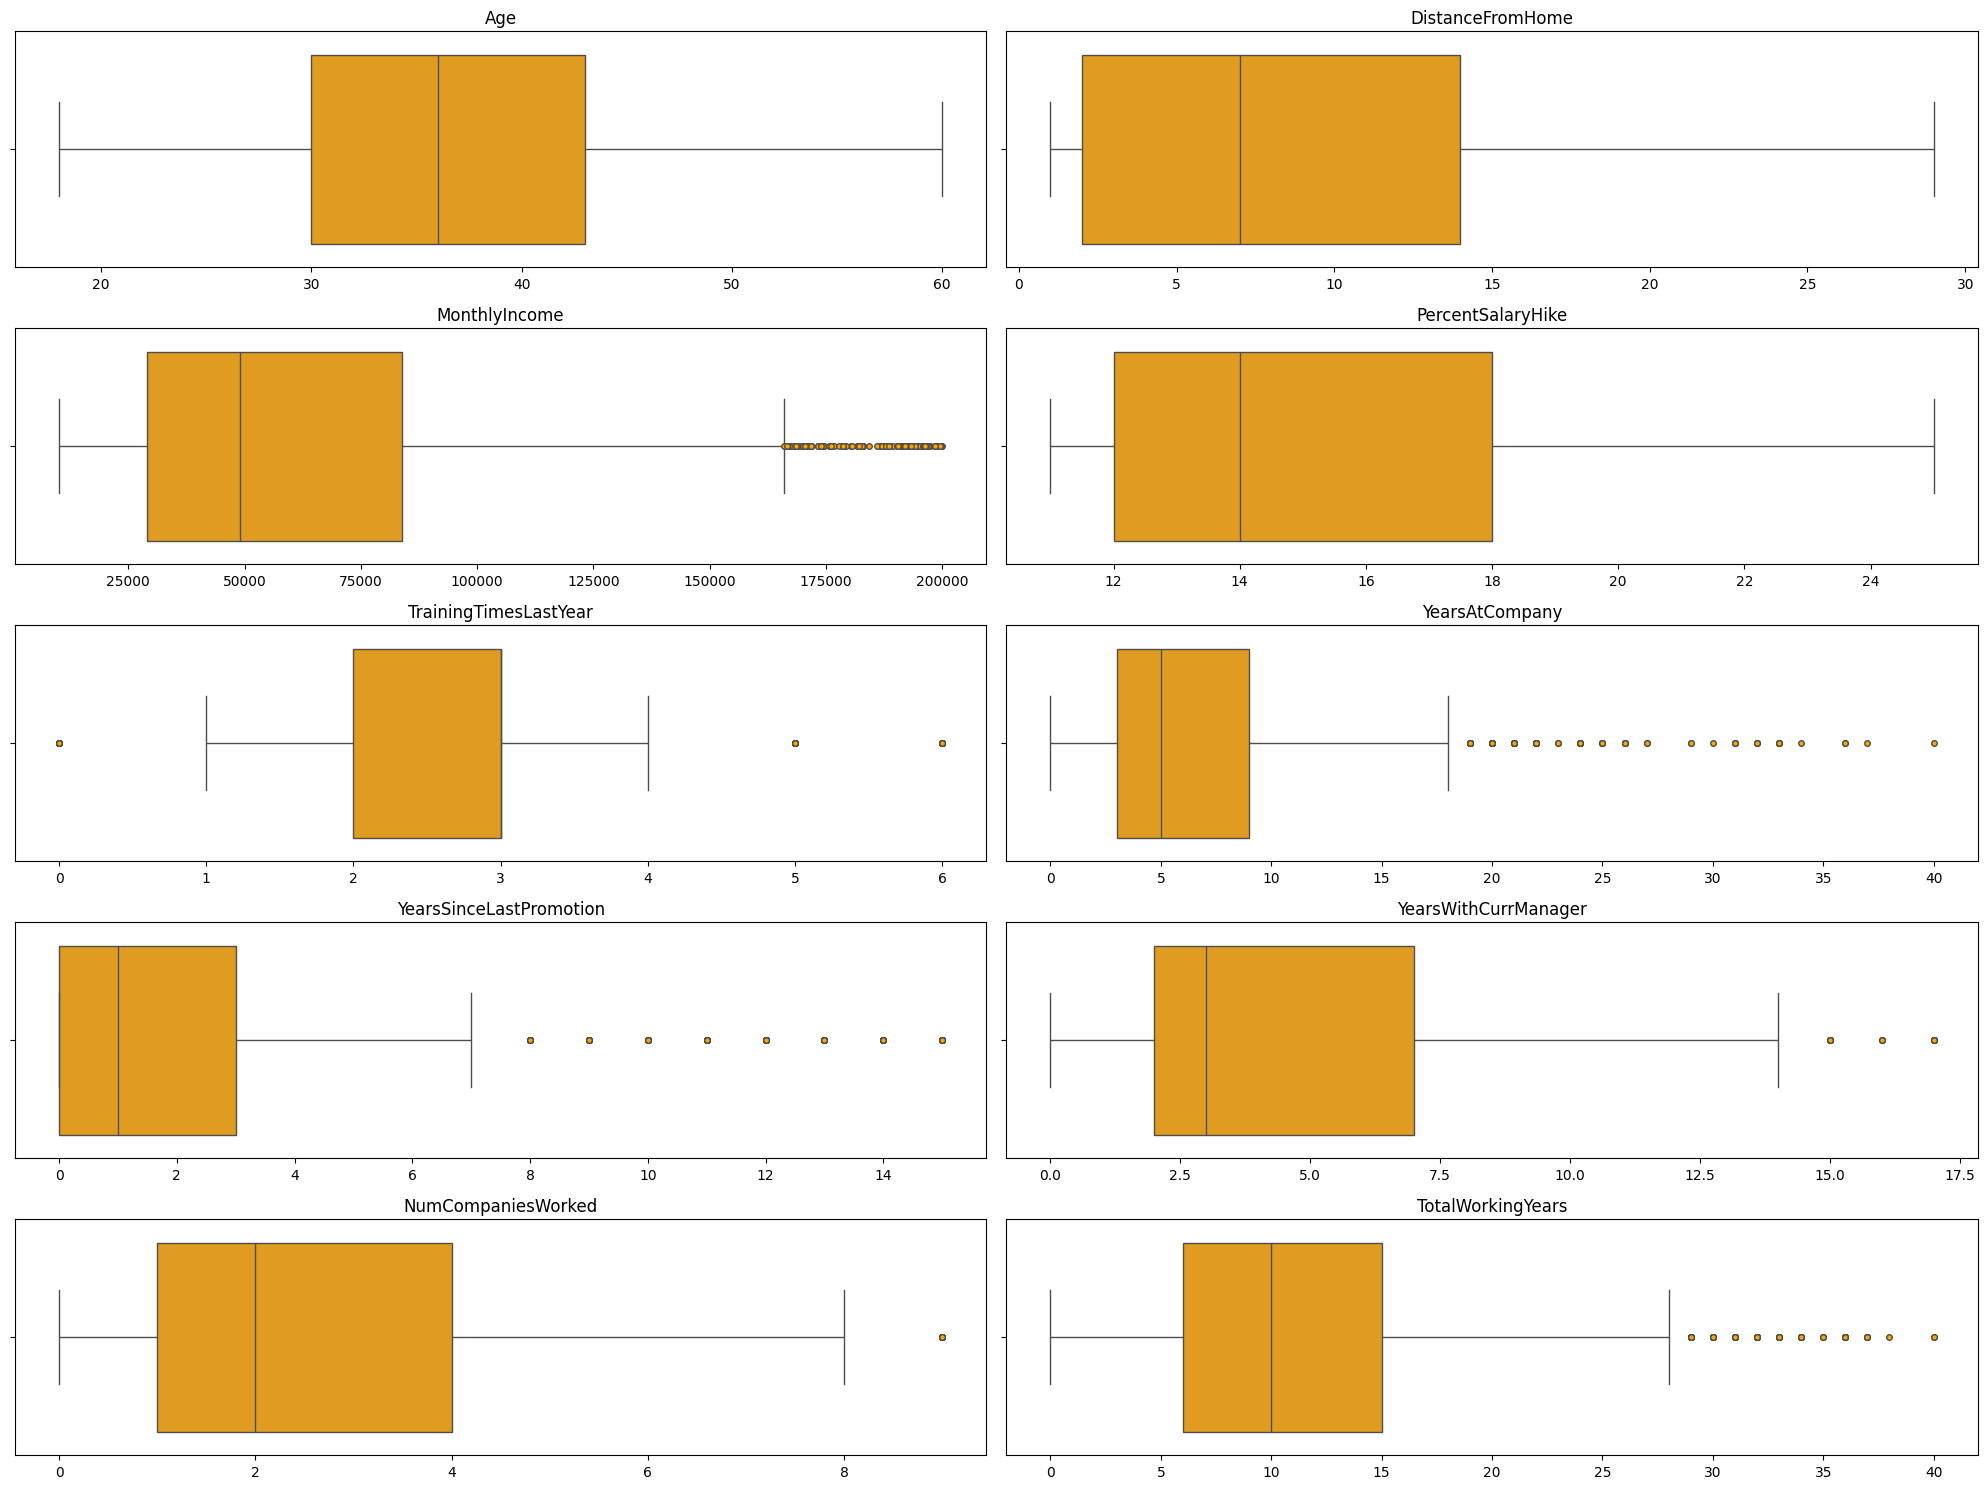

In [21]:
# instanciamos la clase que nos permite identificar y gestionar outliers
gestion = so.GestionOutliersUnivariados(df)

# llamamos al método que nos permite identificar outliers univariados de forma visual (histograma y boxplot)
gestion.visualizar_outliers_univariados(color="orange")

In [22]:
outliers_iqr = gestion.detectar_outliers_iqr()

La cantidad de outliers que tenemos para la columna MONTHLYINCOME es 121
La cantidad de outliers que tenemos para la columna TRAININGTIMESLASTYEAR es 251
La cantidad de outliers que tenemos para la columna YEARSATCOMPANY es 110
La cantidad de outliers que tenemos para la columna YEARSSINCELASTPROMOTION es 112
La cantidad de outliers que tenemos para la columna YEARSWITHCURRMANAGER es 16
La cantidad de outliers que tenemos para la columna NUMCOMPANIESWORKED es 54
La cantidad de outliers que tenemos para la columna TOTALWORKINGYEARS es 64


In [23]:
gestion_multi = so.GestionOutliersMultivariados(df)

# lo primero que tenemos que hacer es calcular el valor de epsilon ideal, por lo que usaremos el punto de máxima curvatura
out_multi = gestion_multi.calcular_epsilon_dbscan()
out_multi

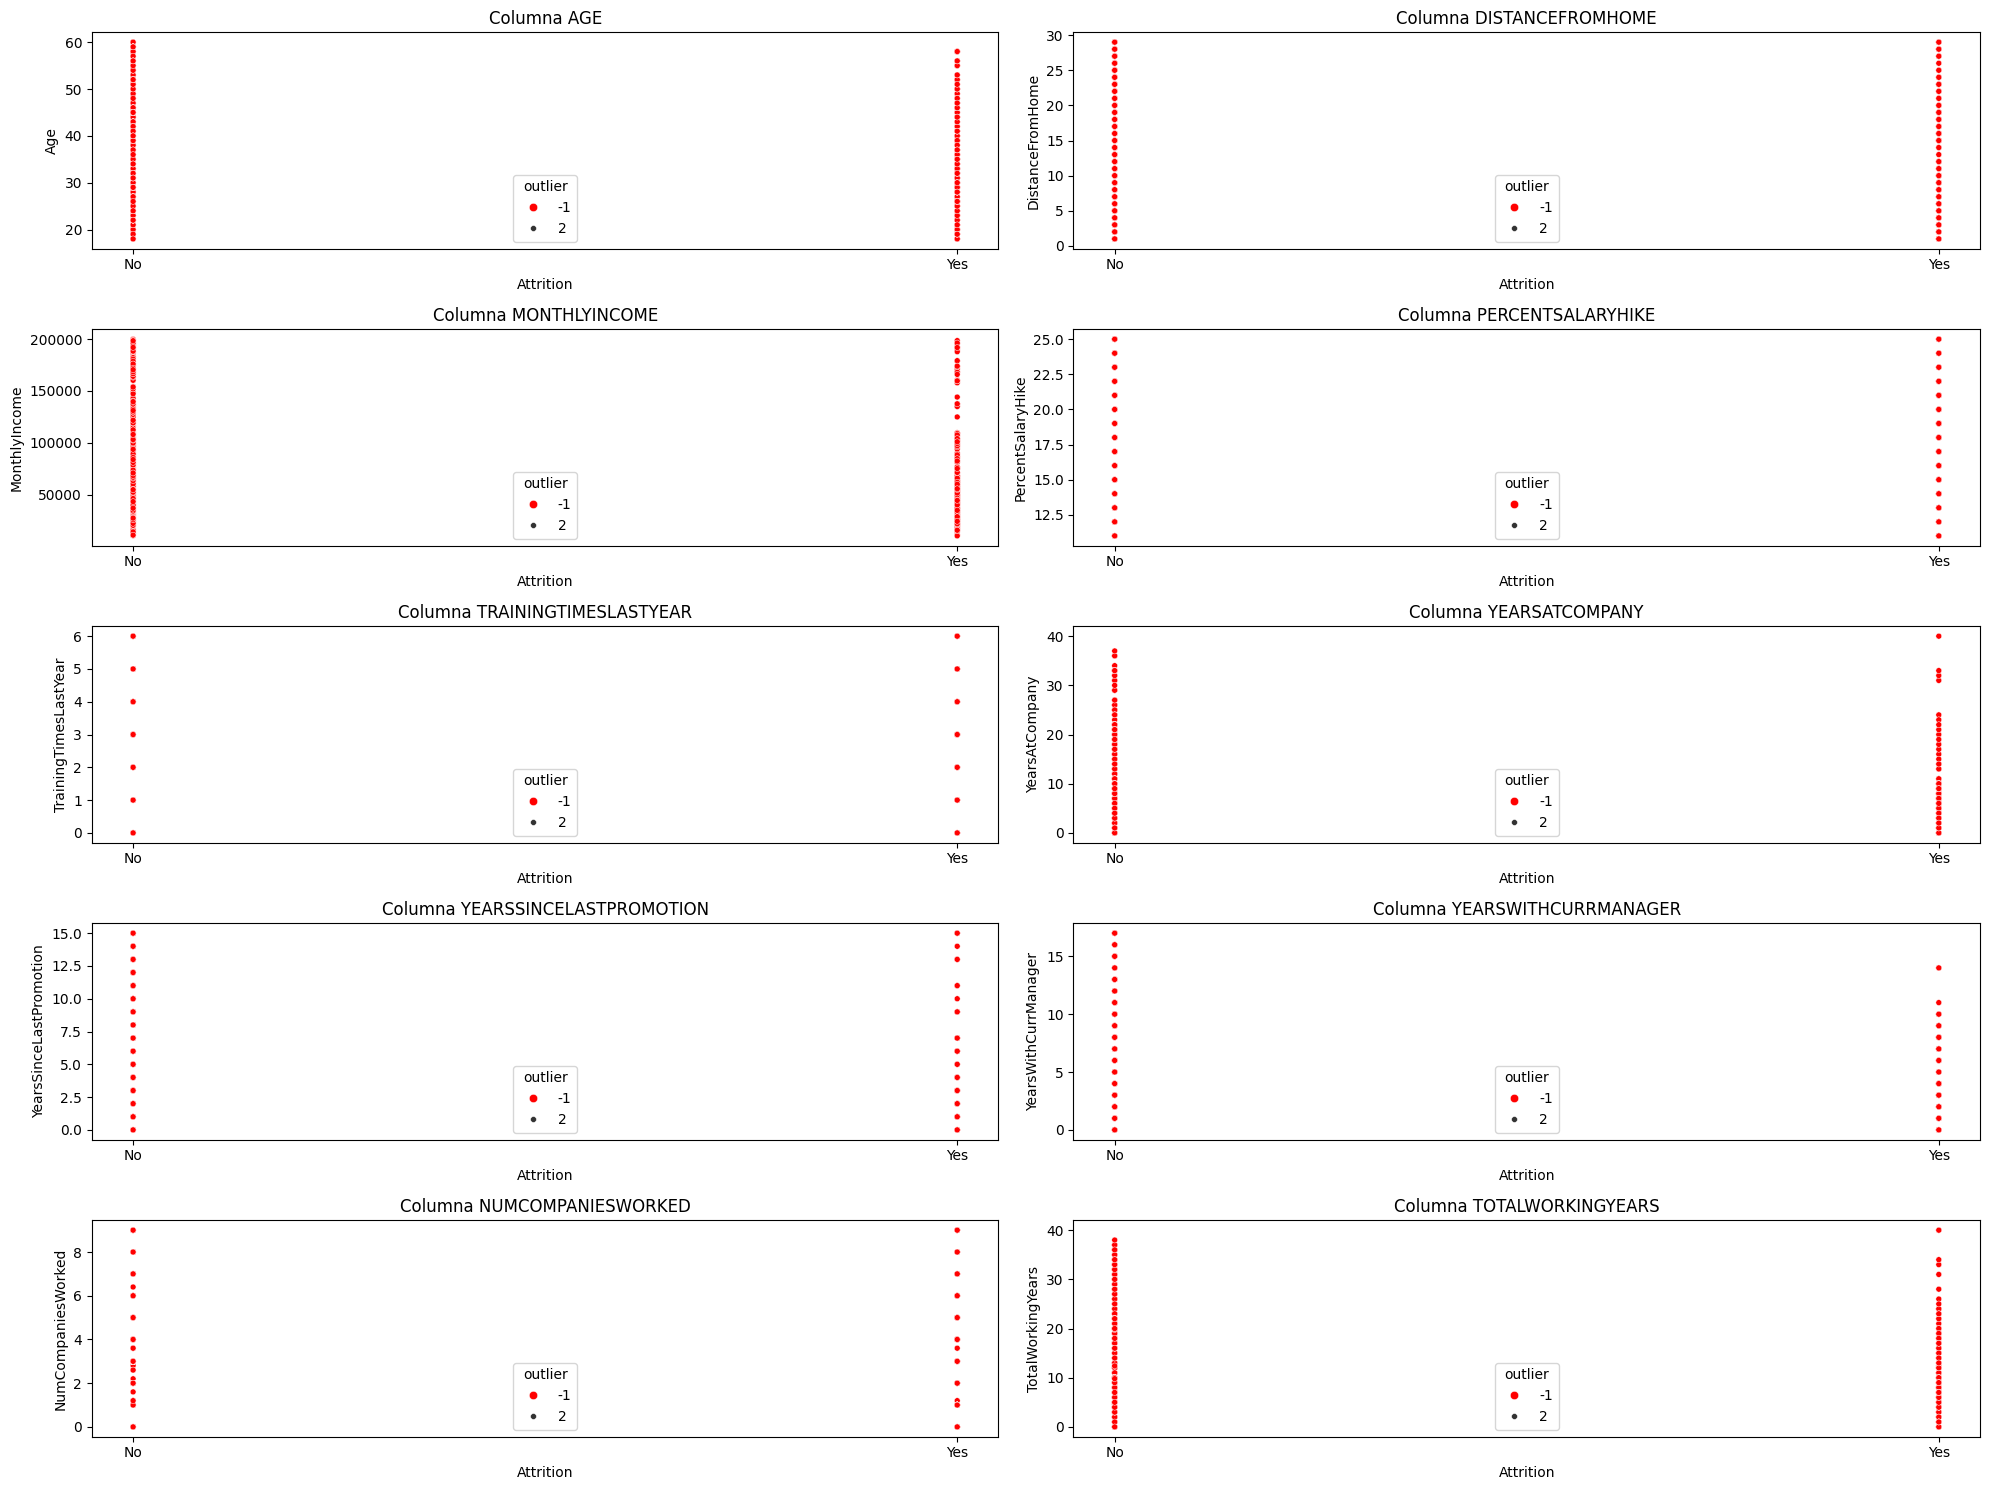

In [24]:
# identificamos los outliers usando el método de DBSCAN
gestion_multi.explorar_outliers_dbscan(epsilon = 75, min_muestras = 20, var_dependiente = "Attrition")

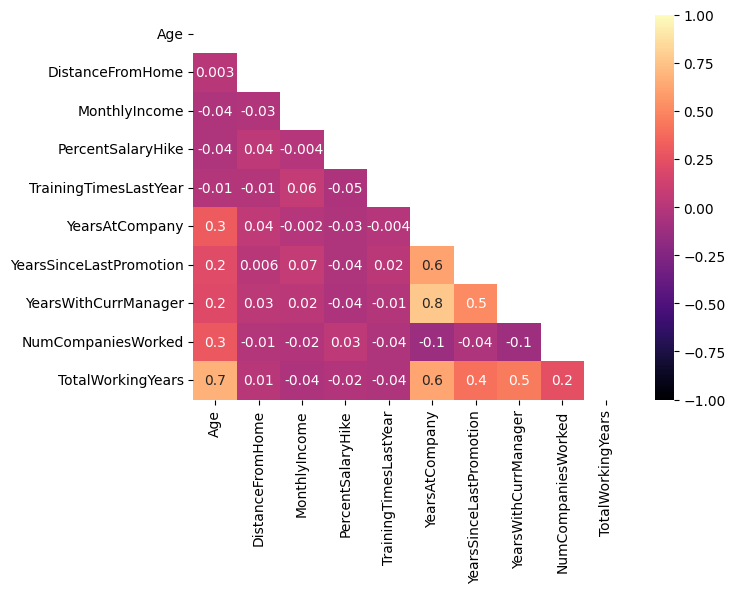

In [25]:
# evaluamos las correlaciones entre las variables numéricas
visualizador.correlacion()


In [26]:
#Volvemos a  a cambiar a float las columnas que que antes hemos metido como categorias para el procesamiento.
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype('float')
df['JobSatisfaction'] = df['JobSatisfaction'].astype('float')
df['PerformanceRating'] = df['PerformanceRating'].astype('float')
df['JobLevel'] = df['JobLevel'].astype('float')
df['StockOptionLevel'] = df['StockOptionLevel'].astype('float')
df['JobInvolvement'] = df['JobInvolvement'].astype('float')
df['Education'] = df['Education'].astype('float')
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('float')


In [ ]:
# Instanciamos la clase de Escalado
escalar = sf.FeatureScaling(dataframe = df, lista_numericas = df.select_dtypes(include = np.number).columns)

# llamamos al método para estandarizar los datos
df_standard = escalar.standard_scaler()
df_standard.head()

# generamos un DataFrame final con en el que trabajaremos en siguientes lecciones 
df_esta = escalar.unir_datos_escalados(df_standard)
df_esta.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked,TotalWorkingYears
0,1.552009,No,Travel_Rarely,Sales,-0.386799,-0.889291,Life Sciences,Female,-0.954734,Healthcare Representative,Married,1.403148,-1.151253,-0.932702,2.484523,-0.983901,-0.680036,-1.148304,0.379939,-0.422833,0.259904,1.153777,-1.088567,-0.679394,-1.326654
1,-0.647878,Yes,Travel_Frequently,Research & Development,0.106629,-1.866507,Life Sciences,Female,-0.954734,Research Scientist,Single,-0.491114,2.143183,0.242427,0.152848,-0.326418,-0.368086,-0.029481,-1.024300,2.364999,0.259904,-0.668839,1.770185,-1.079733,-0.679749
2,-0.537884,No,Travel_Frequently,Research & Development,0.970128,1.065140,Other,Male,1.754504,Sales Executive,Married,2.721301,-0.053108,2.592685,-0.624377,-0.326418,-0.680036,-0.309186,0.379939,-0.422833,-0.660884,-0.668839,-2.517943,-0.679394,-0.809130
3,0.122082,No,Non-Travel,Research & Development,-0.880227,2.042356,Life Sciences,Male,0.851425,Human Resources,Married,0.385675,-1.151253,2.592685,1.707298,0.166695,1.503618,0.250225,-1.024300,-0.422833,1.180691,1.153777,0.340809,0.121285,0.225918
4,-0.537884,No,Travel_Rarely,Research & Development,0.106629,-1.866507,Medical,Male,-0.954734,Sales Executive,Single,-0.883037,-0.876716,1.417556,-0.624377,-0.162047,-0.680036,-0.029481,0.379939,-0.422833,1.180691,-1.580148,0.340809,0.521625,-0.291606


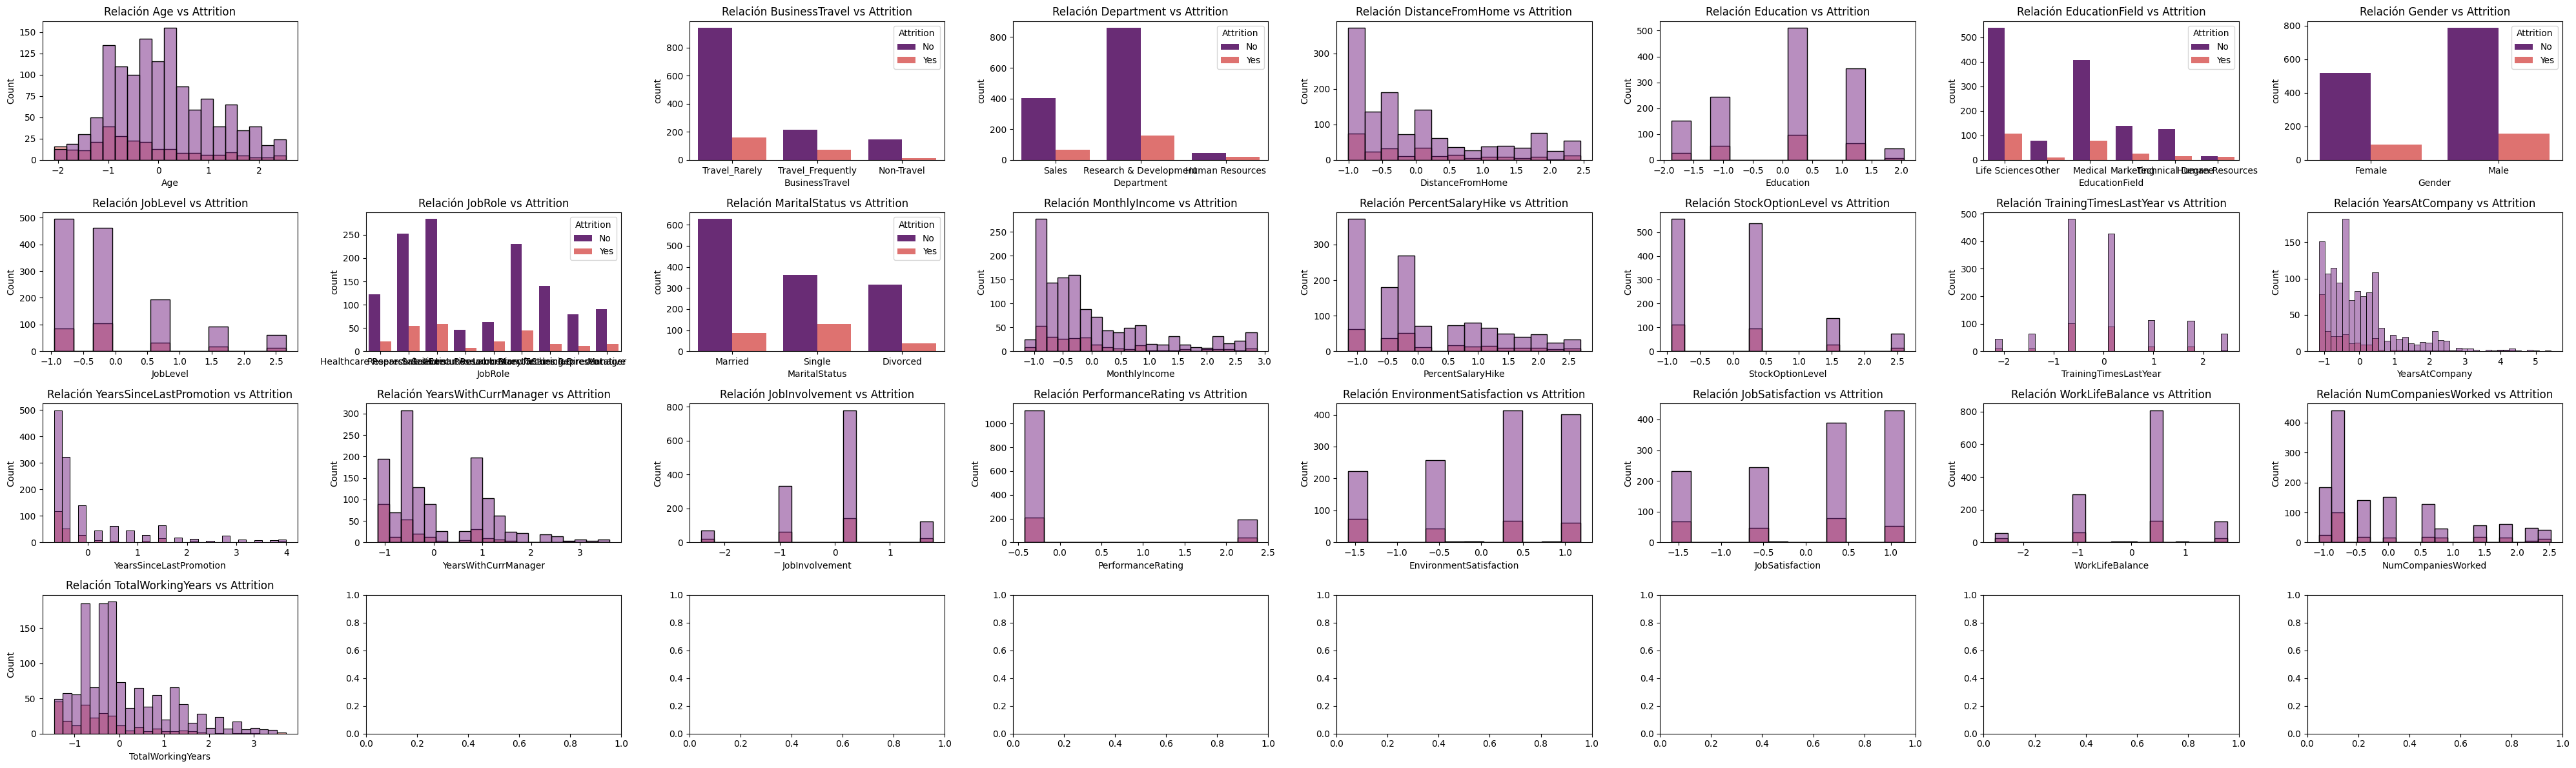

In [28]:
# evaluamos la relación entre las variables independientes y dependientes
visualizador.plot_relacion(vr = "Attrition")

In [ ]:
# antes de nada debemos convertir la variable respuesta en numérica, por lo que asignaremos Yes con 1, y No con 0
mapa_attrition = {"Yes": 1, "No": 0}
df["Attrition"] = df["Attrition"].map(mapa_attrition)

# sacamos la lista de columnas categóricas
lista_col_categ = df.select_dtypes(include = ["O", "category"])

for columna in lista_col_categ:

    print(f"Analizando la relación entre Attrition y {columna.upper()}")
    # Inicializar la clase
    analisis_chi2 = se.AnalisisChiCuadrado(df, variable_predictora = columna, variable_respuesta = 'Attrition')

    # Generar la tabla de contingencia
    tabla_contingencia = analisis_chi2.generar_tabla_contingencia()

    # Realizar la prueba de Chi-cuadrado
    resultado_chi2 = analisis_chi2.realizar_prueba_chi_cuadrado()

    print("\n ##################################### \n")

Analizando la relación entre Attrition y BUSINESSTRAVEL
Tabla de contingencia:


BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0,147,217,942
1,12,75,163



Resultado de la prueba de Chi-cuadrado:
Chi2: 30.007313267463317, p-valor: 3.047857903730426e-07
El p-valor < 0.05, parece que hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y DEPARTMENT
Tabla de contingencia:


Department,Human Resources,Research & Development,Sales
Attrition,,,
0,44,860,402
1,22,159,69



Resultado de la prueba de Chi-cuadrado:
Chi2: 15.454750625804273, p-valor: 0.00044059903539278616
El p-valor < 0.05, parece que hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y EDUCATIONFIELD
Tabla de contingencia:


EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
0,16,538,140,406,79,127
1,12,108,25,80,10,15



Resultado de la prueba de Chi-cuadrado:
Chi2: 19.993431100585955, p-valor: 0.0012532826856938972
El p-valor < 0.05, parece que hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y GENDER
Tabla de contingencia:


Gender,Female,Male
Attrition,,
0,518,788
1,94,156



Resultado de la prueba de Chi-cuadrado:
Chi2: 0.29282219268687126, p-valor: 0.5884176531585328
El p-valor >= 0.05, no hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y JOBROLE
Tabla de contingencia:


JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
0,122,46,230,90,140,62,253,284,79
1,21,7,45,16,16,21,54,58,12



Resultado de la prueba de Chi-cuadrado:
Chi2: 11.059399642772446, p-valor: 0.19835619744999797
El p-valor >= 0.05, no hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y MARITALSTATUS
Tabla de contingencia:


MaritalStatus,Divorced,Married,Single
Attrition,,,
0,317,627,362
1,36,85,129



Resultado de la prueba de Chi-cuadrado:
Chi2: 55.94063961745762, p-valor: 7.12269667491083e-13
El p-valor < 0.05, parece que hay diferencias entre los grupos.

 ##################################### 



In [30]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement',
       'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'NumCompaniesWorked', 'TotalWorkingYears'],
      dtype='object')

In [31]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked,TotalWorkingYears
0,1.552009,0,Travel_Rarely,Sales,-0.386799,-0.889291,Life Sciences,Female,-0.954734,Healthcare Representative,Married,1.403148,-1.151253,-0.932702,2.484523,-0.983901,-0.680036,-1.148304,0.379939,-0.422833,0.259904,1.153777,-1.088567,-0.679394,-1.326654
1,-0.647878,1,Travel_Frequently,Research & Development,0.106629,-1.866507,Life Sciences,Female,-0.954734,Research Scientist,Single,-0.491114,2.143183,0.242427,0.152848,-0.326418,-0.368086,-0.029481,-1.024300,2.364999,0.259904,-0.668839,1.770185,-1.079733,-0.679749
2,-0.537884,0,Travel_Frequently,Research & Development,0.970128,1.065140,Other,Male,1.754504,Sales Executive,Married,2.721301,-0.053108,2.592685,-0.624377,-0.326418,-0.680036,-0.309186,0.379939,-0.422833,-0.660884,-0.668839,-2.517943,-0.679394,-0.809130
3,0.122082,0,Non-Travel,Research & Development,-0.880227,2.042356,Life Sciences,Male,0.851425,Human Resources,Married,0.385675,-1.151253,2.592685,1.707298,0.166695,1.503618,0.250225,-1.024300,-0.422833,1.180691,1.153777,0.340809,0.121285,0.225918
4,-0.537884,0,Travel_Rarely,Research & Development,0.106629,-1.866507,Medical,Male,-0.954734,Sales Executive,Single,-0.883037,-0.876716,1.417556,-0.624377,-0.162047,-0.680036,-0.029481,0.379939,-0.422833,1.180691,-1.580148,0.340809,0.521625,-0.291606


In [32]:
diccionario_encoding = { "target": ['Gender', "JobLevel"] , 
                        "onehot": ['MaritalStatus','JobRole','BusinessTravel', 'Department','EducationField']} 
# En caso de que queramos aplicar el método solo a una columna
encoding = se.Encoding(df, variable_respuesta="Attrition", diccionario_encoding=diccionario_encoding)
df = encoding.one_hot_encoding()
df = encoding.target_encoding()
df.head()

['Gender', 'JobLevel']


Gender
Male      944
Female    612
Name: count, dtype: int64

JobLevel
-0.954734    580
-0.051654    565
 0.851425    227
 1.754504    110
 2.657584     74
Name: count, dtype: int64

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked,TotalWorkingYears,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1.552009,0,-0.386799,-0.889291,0.153595,0.146552,1.403148,-1.151253,-0.932702,2.484523,-0.983901,-0.680036,-1.148304,0.379939,-0.422833,0.259904,1.153777,-1.088567,-0.679394,-1.326654,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.647878,1,0.106629,-1.866507,0.153595,0.146552,-0.491114,2.143183,0.242427,0.152848,-0.326418,-0.368086,-0.029481,-1.024300,2.364999,0.259904,-0.668839,1.770185,-1.079733,-0.679749,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.537884,0,0.970128,1.065140,0.165254,0.154546,2.721301,-0.053108,2.592685,-0.624377,-0.326418,-0.680036,-0.309186,0.379939,-0.422833,-0.660884,-0.668839,-2.517943,-0.679394,-0.809130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.122082,0,-0.880227,2.042356,0.165254,0.140969,0.385675,-1.151253,2.592685,1.707298,0.166695,1.503618,0.250225,-1.024300,-0.422833,1.180691,1.153777,0.340809,0.121285,0.225918,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.537884,0,0.106629,-1.866507,0.165254,0.146552,-0.883037,-0.876716,1.417556,-0.624377,-0.162047,-0.680036,-0.029481,0.379939,-0.422833,1.180691,-1.580148,0.340809,0.521625,-0.291606,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


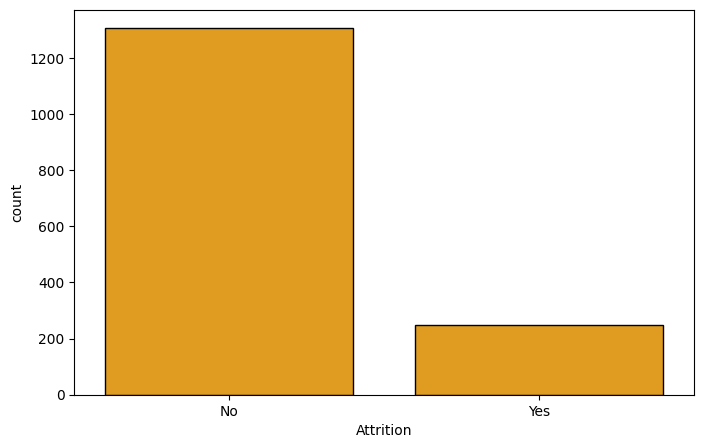

In [33]:
desbalanceo = sl.Desbalanceo(dataframe = df, variable_dependiente = "Attrition")
desbalanceo.visualizar_clase()

##  Desbalanceo por Smotenc

In [34]:
# lo siguiente que tenemos que hacer es dividir los datos en X e Y 
X = df.drop(columns = "Attrition")
y = df["Attrition"]

In [35]:
# dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
df.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'Gender',
       'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'NumCompaniesWorked', 'TotalWorkingYears', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sa

In [37]:
columnas_smot = ['Gender', 'JobLevel',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',]

In [38]:
# aplicamos el smotenc
smotenc = SMOTENC(categorical_features=columnas_smot, random_state=42, k_neighbors=5) 
X_resampled, y_resampled = smotenc.fit_resample(X, y)

# Mostrar el dataset balanceado
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Attrition'] = y_resampled


In [39]:
resampled_data.head()

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked,TotalWorkingYears,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition
0,1.552009,-0.386799,-0.889291,0.153595,0.146552,1.403148,-1.151253,-0.932702,2.484523,-0.983901,-0.680036,-1.148304,0.379939,-0.422833,0.259904,1.153777,-1.088567,-0.679394,-1.326654,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.647878,0.106629,-1.866507,0.153595,0.146552,-0.491114,2.143183,0.242427,0.152848,-0.326418,-0.368086,-0.029481,-1.024300,2.364999,0.259904,-0.668839,1.770185,-1.079733,-0.679749,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,-0.537884,0.970128,1.065140,0.165254,0.154546,2.721301,-0.053108,2.592685,-0.624377,-0.326418,-0.680036,-0.309186,0.379939,-0.422833,-0.660884,-0.668839,-2.517943,-0.679394,-0.809130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.122082,-0.880227,2.042356,0.165254,0.140969,0.385675,-1.151253,2.592685,1.707298,0.166695,1.503618,0.250225,-1.024300,-0.422833,1.180691,1.153777,0.340809,0.121285,0.225918,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-0.537884,0.106629,-1.866507,0.165254,0.146552,-0.883037,-0.876716,1.417556,-0.624377,-0.162047,-0.680036,-0.029481,0.379939,-0.422833,1.180691,-1.580148,0.340809,0.521625,-0.291606,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


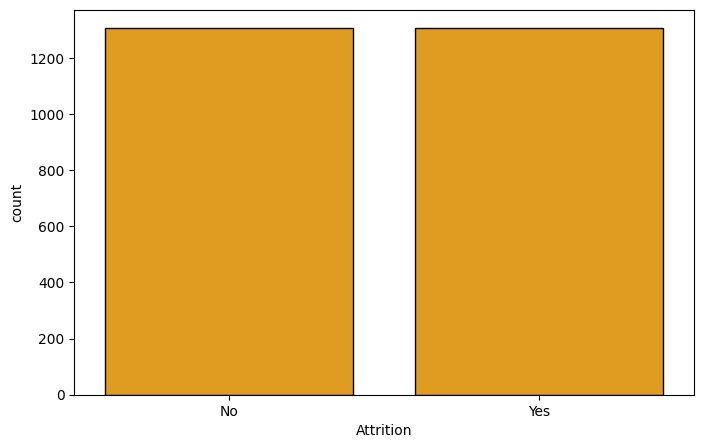

In [40]:
desbalanceo = sl.Desbalanceo(dataframe = resampled_data, variable_dependiente = "Attrition")
desbalanceo.visualizar_clase()

In [41]:
resampled_data.to_pickle('../data/preprocesado/datos_preprocesados.pkl')